In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df=pd.read_csv(r"c:\DATA SCIENCE\Machine_Learning\Datasets\framingham.csv")
df.head() 

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [13]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<Axes: >

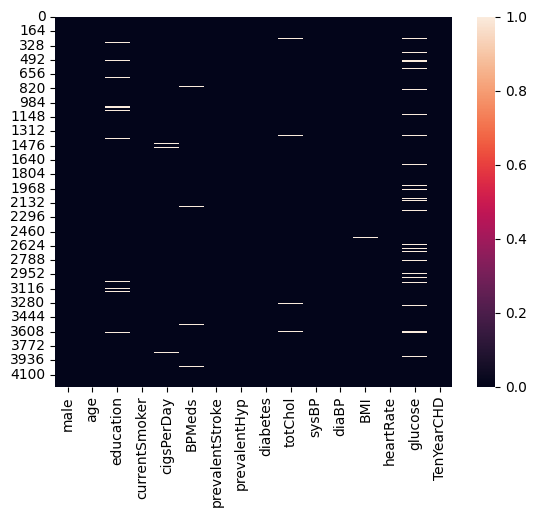

In [14]:
sns.heatmap(df.isnull())

In [15]:
for i in df.columns:
    df[i]=df[i].fillna(df[i].median())

In [16]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [17]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [20]:
x=df.drop("TenYearCHD",axis=1)
y=df["TenYearCHD"]
y

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: TenYearCHD, Length: 4238, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=40,train_size=.80)
x_train.shape,x_test.shape

((3390, 15), (848, 15))

logistic regression

In [22]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test,y_predict))
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

0.8443396226415094
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       710
           1       0.80      0.06      0.11       138

    accuracy                           0.84       848
   macro avg       0.82      0.53      0.51       848
weighted avg       0.84      0.84      0.78       848

[[708   2]
 [130   8]]


c:\Users\prasa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
from sklearn.linear_model import LogisticRegressionCV
model1=LogisticRegressionCV()
model1.fit(x_train,y_train)
y_predict1=model1.predict(x_test)
print(accuracy_score(y_test,y_predict1))
print(classification_report(y_test,y_predict1))
print(confusion_matrix(y_test,y_predict1))

c:\Users\prasa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\prasa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://sciki

0.8466981132075472
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       710
           1       1.00      0.06      0.11       138

    accuracy                           0.85       848
   macro avg       0.92      0.53      0.51       848
weighted avg       0.87      0.85      0.78       848

[[710   0]
 [130   8]]


c:\Users\prasa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [27]:
model2=LogisticRegression()
model2.fit(x_train_scaled,y_train)
y_predict2=model2.predict(x_test_scaled)
print(accuracy_score(y_test,y_predict2))
print(classification_report(y_test,y_predict2))
print(confusion_matrix(y_test,y_predict2))

0.847877358490566
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       710
           1       1.00      0.07      0.12       138

    accuracy                           0.85       848
   macro avg       0.92      0.53      0.52       848
weighted avg       0.87      0.85      0.79       848

[[710   0]
 [129   9]]


In [28]:
model3=LogisticRegressionCV()
model3.fit(x_train_scaled,y_train)
y_predict3=model3.predict(x_test_scaled)
print(accuracy_score(y_test,y_predict3))
print(classification_report(y_test,y_predict3))
print(confusion_matrix(y_test,y_predict3))

0.8466981132075472
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       710
           1       0.90      0.07      0.12       138

    accuracy                           0.85       848
   macro avg       0.87      0.53      0.52       848
weighted avg       0.85      0.85      0.79       848

[[709   1]
 [129   9]]


decision trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
model_deci=DecisionTreeClassifier()
model_deci.fit(x_train,y_train)
y_predict_deci=model_deci.predict(x_test)
print(accuracy_score(y_test,y_predict_deci))
print(classification_report(y_test,y_predict_deci))
print(confusion_matrix(y_test,y_predict_deci))

0.7558962264150944
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       710
           1       0.24      0.23      0.24       138

    accuracy                           0.76       848
   macro avg       0.55      0.54      0.55       848
weighted avg       0.75      0.76      0.75       848

[[609 101]
 [106  32]]


[Text(0.4930133459702978, 0.9782608695652174, 'x[1] <= 48.5\ngini = 0.254\nsamples = 3390\nvalue = [2884.0, 506.0]'),
 Text(0.2171970583357901, 0.9347826086956522, 'x[14] <= 232.5\ngini = 0.145\nsamples = 1658\nvalue = [1528, 130]'),
 Text(0.3551052021530439, 0.9565217391304348, 'True  '),
 Text(0.21248007720371462, 0.8913043478260869, 'x[9] <= 424.5\ngini = 0.141\nsamples = 1653\nvalue = [1527.0, 126.0]'),
 Text(0.21012158663767688, 0.8478260869565217, 'x[4] <= 9.5\ngini = 0.139\nsamples = 1651\nvalue = [1527, 124]'),
 Text(0.14414661335495282, 0.8043478260869565, 'x[11] <= 107.5\ngini = 0.089\nsamples = 899\nvalue = [857, 42]'),
 Text(0.12732624557783018, 0.7608695652173914, 'x[12] <= 39.425\ngini = 0.082\nsamples = 884\nvalue = [846, 38]'),
 Text(0.11019494398584906, 0.717391304347826, 'x[10] <= 172.0\ngini = 0.079\nsamples = 876\nvalue = [840, 36]'),
 Text(0.0830078125, 0.6739130434782609, 'x[13] <= 78.5\ngini = 0.075\nsamples = 867\nvalue = [833, 34]'),
 Text(0.04248968160377359, 

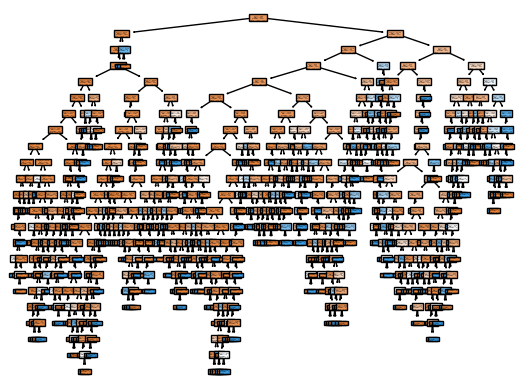

In [30]:
from sklearn import tree
tree.plot_tree(model_deci,filled=True)